# optimizing model with automatic gradient computation using autograd
---
### steps
* implement linear regression  
* calculate model prediction and loss function
* do numerical computation of gradient
* implement gradient descent algorithm.

# PART A: Building from scratch we here just use numpy
---
### gradient
---
$J = MSE = \frac{1}{N}\times (\mathbf{w}.\mathbf{x} - \mathbf{y})^2$

$\frac{dJ}{dw} = \frac{1}{N}\times 2 \times [\mathbf{x}.(\mathbf{w}.\mathbf{x} - \mathbf{y})]$

In [ ]:
import numpy as np
# linear regression
# f = w.x + b
# f = 2.x (here we keep weight as 2 and ignore the bias)
X = np.array([1,2,3,4],dtype = np.float32)
Y = np.array([2,4,6,8],dtype = np.float32)
w = 0.0

# model prediction
def forward(x):
    return w*x

# loss  = MSE
def loss(y,y_hat):
    return ((y_hat-y)**2).mean()
# gradient
# J = MSE = 1/N * (w.x - y)^2
# dJ/dw = 1/N * (2x).(w.x - y)
def gradient(x,y,y_hat):
    return np.dot(2*x,y_hat-y).mean()

print(f'prediction before training: f(5) = {forward(5):.3f}')

#training
lr = 0.01
n_iters = 10
for epoch in range(n_iters):
    y_pred = forward(X)

    #loss
    l = loss(Y,y_pred)

    #gradients
    del_w = gradient(X,Y,y_pred)
    w-=lr*del_w

    if epoch%1 == 0:
        print(f'epoch {epoch+1}:w = {w:.3f},loss = {l:.8f}')

print(f'prediction after training: f(5) = {forward(5):.3f}')

prediction before training: f(5) = 0.000
epoch 1:w = 1.200,loss = 30.00000000
epoch 2:w = 1.680,loss = 4.79999924
epoch 3:w = 1.872,loss = 0.76800019
epoch 4:w = 1.949,loss = 0.12288000
epoch 5:w = 1.980,loss = 0.01966083
epoch 6:w = 1.992,loss = 0.00314574
epoch 7:w = 1.997,loss = 0.00050331
epoch 8:w = 1.999,loss = 0.00008053
epoch 9:w = 1.999,loss = 0.00001288
epoch 10:w = 2.000,loss = 0.00000206
prediction after training: f(5) = 9.999


---
# PART B: using pytorch and doing things using inbuilt functions
---

In [ ]:
import torch
# linear regression
# f = w.x + b
# f = 2.x (here we keep weight as 2 and ignore the bias)
X = torch.tensor([1,2,3,4],dtype = torch.float32)
Y = torch.tensor([2,4,6,8],dtype = torch.float32)
w = torch.tensor(0.0,dtype = torch.float32,requires_grad = True)

# model prediction
def forward(x):
    return w*x

# loss  = MSE
def loss(y,y_hat):
    return ((y_hat-y)**2).mean()

print(f'prediction before training: f(5) = {forward(5):.3f}')

#training
lr = 0.01
n_iters = 100
for epoch in range(n_iters):
    y_pred = forward(X)

    #loss
    l = loss(Y,y_pred)

    #gradients = backward pass
    l.backward()
    del_w = w.grad

    # update weights
    # as updating weights should not be in the gradient computation tracking thus
    with torch.no_grad():
        w-=lr*del_w
    # we dont want our gradients from this epoch
    # to affect the gradients of next epoch after updating weights
    # thus we make grads of weight as zero after updating them
    w.grad.zero_()

    if epoch%10 == 0:
        print(f'epoch {epoch+1}:w = {w:.3f},loss = {l:.8f}')

print(f'prediction after training: f(5) = {forward(5):.3f}')

prediction before training: f(5) = 0.000
epoch 1:w = 0.300,loss = 30.00000000
epoch 11:w = 1.665,loss = 1.16278565
epoch 21:w = 1.934,loss = 0.04506890
epoch 31:w = 1.987,loss = 0.00174685
epoch 41:w = 1.997,loss = 0.00006770
epoch 51:w = 1.999,loss = 0.00000262
epoch 61:w = 2.000,loss = 0.00000010
epoch 71:w = 2.000,loss = 0.00000000
epoch 81:w = 2.000,loss = 0.00000000
epoch 91:w = 2.000,loss = 0.00000000
prediction after training: f(5) = 10.000


---
# PART B: using pytorch and doing things using inbuilt functions for loss and parameter updates as well using optimizers
---

training pipeline in pytorch
* Design model(input,output size, forward pass)
* Construct loss and optimizer
* Training loop
    * forward pass: compute prediction
    * backward pass: gradients
    * update weights

In [1]:
import torch
import torch.nn as nn
# linear regression
# f = w.x + b
# f = 2.x (here we keep weight as 2 and ignore the bias)
X = torch.tensor([
                    [1],
                    [2],
                    [3],
                    [4]
                ],dtype = torch.float32)

Y = torch.tensor([
                    [2],
                    [4],
                    [6],
                    [8]
                    ],dtype = torch.float32)

w = torch.tensor(0.0,dtype = torch.float32,requires_grad = True)

# inbuilt model takes input as 2d tensor as here each row
# defines the features and columns for the data points


n_datapoints,n_features = X.shape

# model takes parameters as the input dimensions and output dimensions
# here the model takes random weights and we do not need explicit deifintion of weights
model = nn.Linear(n_features,n_features) #forward passing model

# test tensor
X_test = torch.tensor([5],dtype=torch.float32)

print(f'prediction before training: f(5) = {model(X_test).item():.3f}')

#training
lr = 0.01
n_iters = 100
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = lr)
for epoch in range(n_iters):
    y_pred = model(X)

    #loss
    l = loss(Y,y_pred)

    #gradients = backward pass
    l.backward()

    # update weights
    # as updating weights should not be in the gradient computation tracking thus
    optimizer.step() # automatically optimizing the weights based on the gradient


    # we dont want our gradients from this epoch
    # to affect the gradients of next epoch after updating weights
    # thus we make grads of weight as zero after updating them
    optimizer.zero_grad()

    if epoch%10 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch+1}:w = {w[0][0].item():.3f},loss = {l:.8f}')

print(f'prediction after training: f(5) = {model(X_test).item():.3f}')

prediction before training: f(5) = 2.902
epoch 1:w = 0.971,loss = 17.60921860
epoch 11:w = 1.928,loss = 0.47346240
epoch 21:w = 2.080,loss = 0.02907923
epoch 31:w = 2.101,loss = 0.01660241
epoch 41:w = 2.102,loss = 0.01535701
epoch 51:w = 2.100,loss = 0.01445597
epoch 61:w = 2.097,loss = 0.01361437
epoch 71:w = 2.094,loss = 0.01282192
epoch 81:w = 2.091,loss = 0.01207559
epoch 91:w = 2.088,loss = 0.01137274
prediction after training: f(5) = 10.177


---
# PART C: Training using custom model
---

In [ ]:
import torch
import torch.nn as nn


class LinearRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegression,self).__init__()

        # define layers
        self.lin = nn.Linear(input_dim,output_dim)

    # remember we need to add this forward function this is
    # what the main running function is when we call the custom model
    def forward(self,x):
        return self.lin(x)


# linear regression
# f = w.x + b
# f = 2.x (here we keep weight as 2 and ignore the bias)
X = torch.tensor([
                    [1],
                    [2],
                    [3],
                    [4]
                ],dtype = torch.float32)

Y = torch.tensor([
                    [2],
                    [4],
                    [6],
                    [8]
                    ],dtype = torch.float32)

w = torch.tensor(0.0,dtype = torch.float32,requires_grad = True)

# inbuilt model takes input as 2d tensor as here each row
# defines the features and columns for the data points


n_datapoints,n_features = X.shape

# model takes parameters as the input dimensions and output dimensions
# here the model takes random weights and we do not need explicit deifintion of weights
model = LinearRegression(n_features,n_features) #forward passing model

# test tensor
X_test = torch.tensor([5],dtype=torch.float32)

print(f'prediction before training: f(5) = {model(X_test).item():.3f}')

#training
lr = 0.01
n_iters = 100
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = lr)
for epoch in range(n_iters):
    y_pred = forward(X)

    #loss
    l = loss(Y,y_pred)

    #gradients = backward pass
    l.backward()

    # update weights
    # as updating weights should not be in the gradient computation tracking thus
    optimizer.step() # automatically optimizing the weights based on the gradient


    # we dont want our gradients from this epoch
    # to affect the gradients of next epoch after updating weights
    # thus we make grads of weight as zero after updating them
    optimizer.zero_grad()

    if epoch%10 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch+1}:w = {w[0][0].item():.3f},loss = {l:.8f}')

print(f'prediction after training: f(5) = {model(X_test).item():.3f}')

prediction before training: f(5) = -1.834
epoch 1:w = -0.434,loss = 30.00000000
epoch 11:w = 1.521,loss = 2.38314009
epoch 21:w = 1.906,loss = 0.09236950
epoch 31:w = 1.981,loss = 0.00358019
epoch 41:w = 1.996,loss = 0.00013877
epoch 51:w = 1.999,loss = 0.00000538
epoch 61:w = 2.000,loss = 0.00000021
epoch 71:w = 2.000,loss = 0.00000001
epoch 81:w = 2.000,loss = 0.00000000
epoch 91:w = 2.000,loss = 0.00000000
prediction after training: f(5) = 10.335


---
# PART D: using pytorch for dataset generation and then using the pipelining methods for model implementation
---

epoch:10000, loss = 332.5676
epoch:20000, loss = 332.5676
epoch:30000, loss = 332.5676
epoch:40000, loss = 332.5676
epoch:50000, loss = 332.5676
epoch:60000, loss = 332.5676
epoch:70000, loss = 332.5676
epoch:80000, loss = 332.5676
epoch:90000, loss = 332.5676
epoch:100000, loss = 332.5676


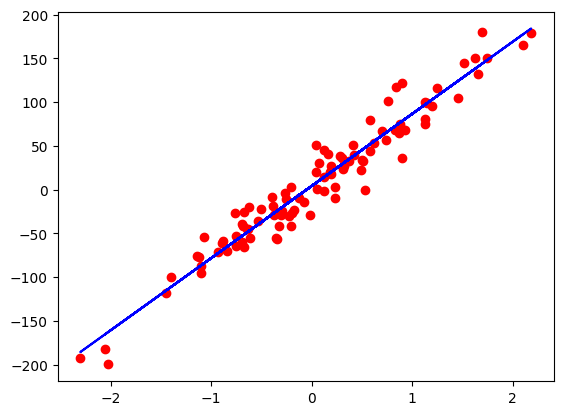

In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# preparing data
x_numpy,y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1) # because initially y is given to us a row tensor
n_samples,n_features = x.shape


# model
input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)

# loss and optimizer
lr = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = lr)

# training loop

n_iter = 100000
for epoch in range(n_iter):

    # forward pass
    y_predicted = model(x)

    # backward pass
    loss = criterion(y_predicted,y)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    optimizer.zero_grad()

    if (epoch+1) % 10000 == 0:
        print(f'epoch:{epoch+1}, loss = {loss.item():.4f}')

# plot
predicted = model(x).detach().numpy()
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')
plt.show()
